<a href="https://colab.research.google.com/github/cesargar1507/DatasetsUB/blob/main/M6_AI1_GarciaCesar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [406]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

In [407]:
ruta = "https://raw.githubusercontent.com/cesargar1507/DatasetsUB/main/act1_healthcare-dataset-stroke-data.csv"
df = pd.read_csv(ruta,sep=",")

In [408]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [409]:
df['work_type'].value_counts()

work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

In [410]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

In [411]:
df['smoking_status'].value_counts()

smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64

In [433]:
#Proporción de instancias para cada clase
class_counts = df['stroke'].value_counts()
total_instances = len(df)
percentages = (class_counts / total_instances) * 100
for class_name, percentage in percentages.items():
  print(f"Class: {class_name}, Percentage: {percentage:.2f}%")

Class: 0, Percentage: 95.74%
Class: 1, Percentage: 4.26%


Se identifica un desbalance de clases, esto afectará el rendimiento del modelo en cuanto a la clasificación de instancias de la clase minoritaria

In [413]:
# Paso 1: Convertir variables categóricas a numéricas
gender_mapping = {"Male": 0, "Female": 1, "Other": 2}
ever_married_mapping = {"No": 0, "Yes": 1}
work_type_mapping = {"Private": 0, "Self-employed": 1, "children": 2, "Govt_job": 3, "Never_worked": 4}
residence_type_mapping = {"Rural": 0, "Urban": 1}
smoking_status_mapping = {"never smoked": 0, "formerly smoked": 1, "smokes": 2, "Unknown": 3}

In [414]:
df["gender"] = df["gender"].map(gender_mapping)
df["ever_married"] = df["ever_married"].map(ever_married_mapping)
df["work_type"] = df["work_type"].map(work_type_mapping)
df["Residence_type"] = df["Residence_type"].map(residence_type_mapping)
df["smoking_status"] = df["smoking_status"].map(smoking_status_mapping)

In [415]:
# Paso 2: Asignar un valor numérico para los casos "Desconocido" en smoking_status
df["smoking_status"].fillna(smoking_status_mapping["Unknown"], inplace=True)

In [416]:
# Paso 3: Eliminar casos con valores faltantes en bmi
df.dropna(subset=["bmi"], inplace=True)

In [417]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,0,1,228.69,36.6,1,1
2,31112,0,80.0,0,1,1,0,0,105.92,32.5,0,1
3,60182,1,49.0,0,0,1,0,1,171.23,34.4,2,1
4,1665,1,79.0,1,0,1,1,0,174.12,24.0,0,1
5,56669,0,81.0,0,0,1,0,1,186.21,29.0,1,1


In [418]:
# Paso 4: Escalar solo las variables numéricas continuas
numerical_features = ["age", "avg_glucose_level", "bmi"]
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [419]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,1.070138,0,1,1,0,1,2.777698,0.981345,1,1
2,31112,0,1.646563,0,1,1,0,0,0.013842,0.459269,0,1
3,60182,1,0.272012,0,0,1,0,1,1.484132,0.701207,2,1
4,1665,1,1.602222,1,0,1,1,0,1.549193,-0.623083,0,1
5,56669,0,1.690903,0,0,1,0,1,1.821368,0.013595,1,1


In [420]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [421]:
# Preparar los datos para el modelo
X = df.drop(columns=["id", "stroke"])
y = df["stroke"]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo
knn.fit(X_train, y_train)

# Hacer predicciones
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

In [422]:
# Evaluar el modelo
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.9439918533604889

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.25      0.02      0.04        53

    accuracy                           0.94       982
   macro avg       0.60      0.51      0.50       982
weighted avg       0.91      0.94      0.92       982



**Imbalance Impact:** La alta precisión y recall para la clase mayoritaria (No Stroke) combinada con la baja precisión y recall para la clase minoritaria (Stroke) son indicativos de un modelo que está altamente sesgado hacia la clase mayoritaria debido al desequilibrio de clases.

**Accuracy Engañoso:** El alto accuracy score es engañoso en este contexto de desequilibrio de clases, ya que refleja principalmente la capacidad del modelo para predecir la clase mayoritaria correctamente.

**Recall Crítico para Clase Minoritaria:** El muy bajo recall para la clase Stroke (0.02) es especialmente problemático, ya que implica que el modelo casi nunca predice correctamente los casos de Stroke, que son probablemente los más críticos desde una perspectiva médica.

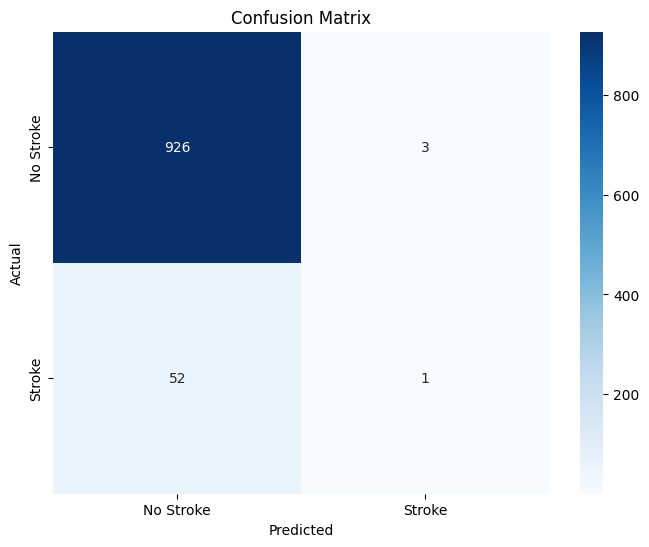

In [423]:
# Graficar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

True Positives (TP): 1
(Actual Stroke, Predicted Stroke)
El modelo identificó correctamente 1 caso de stroke.

True Negatives (TN): 926
(Actual No Stroke, Predicted No Stroke)
El modelo identificó correctamente 926 casos de no stroke.

False Positives (FP): 3
(Actual No Stroke, Predicted Stroke)
El modelo predijo incorrectamente 3 casos de no stroke como stroke.

False Negatives (FN): 52
(Actual Stroke, Predicted No Stroke)
El modelo no logró identificar 52 casos de stroke, clasificándolos incorrectamente como no stroke.

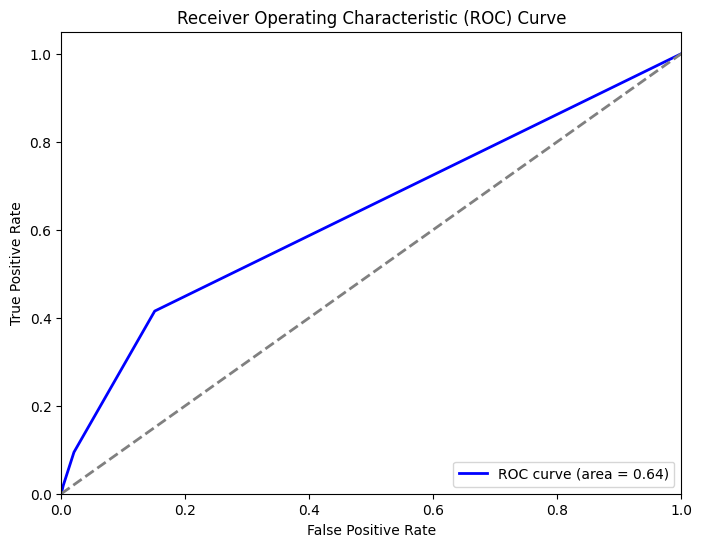

In [424]:
# Graficar la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [425]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

In [426]:
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3, weights='distance')

In [427]:
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.9368635437881874

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       929
           1       0.15      0.04      0.06        53

    accuracy                           0.94       982
   macro avg       0.55      0.51      0.51       982
weighted avg       0.90      0.94      0.92       982



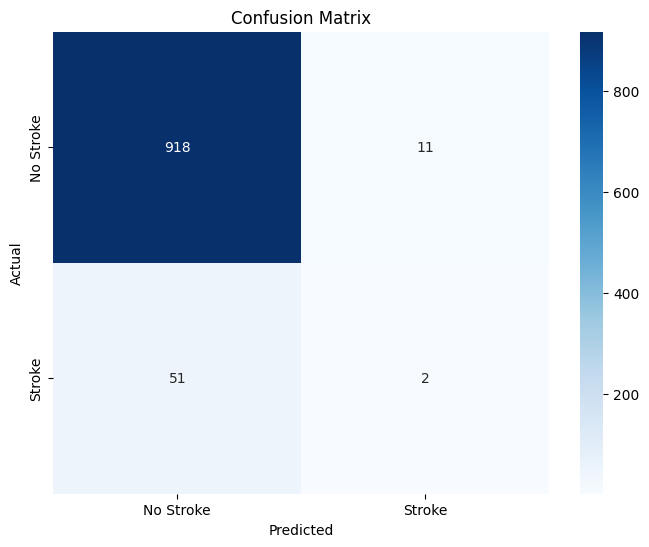

In [428]:
# Graficar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

aunque el modelo tiene un buen rendimiento en la clasificación de la clase mayoritaria (clase 0), muestra dificultades significativas en la clasificación de la clase minoritaria (clase 1).

In [429]:
# Aplicar SMOTE para balancear las clases en el conjunto de entrenamiento
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Crear el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo
knn.fit(X_train_resampled, y_train_resampled)

KNeighborsClassifier()

In [430]:
# Hacer predicciones
y_pred = knn.predict(X_test)
y_prob = knn.predict_proba(X_test)[:, 1]

# Evaluar el modelo
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.790224032586558

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.81      0.88       929
           1       0.12      0.43      0.18        53

    accuracy                           0.79       982
   macro avg       0.54      0.62      0.53       982
weighted avg       0.92      0.79      0.84       982



La precisión del modelo ha disminuido después de aplicar SMOTE. Esto sugiere que, aunque SMOTE ha mejorado el equilibrio de las clases al generar muestras sintéticas de la clase minoritaria, también ha aumentado el número de falsos positivos y falsos negativos, lo que ha reducido la precisión general del modelo.

**Precision, Recall y F1-score para la clase 1:**

**Sin SMOTE**, la precisión para la clase 1 es baja (0.25), lo que indica que hay una cantidad significativa de falsos positivos en las predicciones de la clase 1. El recall también es muy bajo (0.02), lo que significa que el modelo está perdiendo la mayoría de las muestras de la clase 1. Esto resulta en un f1-score muy bajo (0.04).

**Con SMOTE**, la precisión para la clase 1 disminuye aún más (0.12), lo que sugiere una mayor cantidad de falsos positivos. Sin embargo, el recall mejora considerablemente (0.43), lo que significa que el modelo ahora está identificando más muestras de la clase 1. Aunque el f1-score mejora en comparación con la situación sin SMOTE, sigue siendo relativamente bajo (0.18).

SMOTE ha logrado mejorar el recall para la clase 1 al permitir que el modelo capture más muestras de la clase minoritaria. Sin embargo, esto ha venido a costa de una disminución en la precisión, lo que indica más falsos positivos en las predicciones de la clase 1.

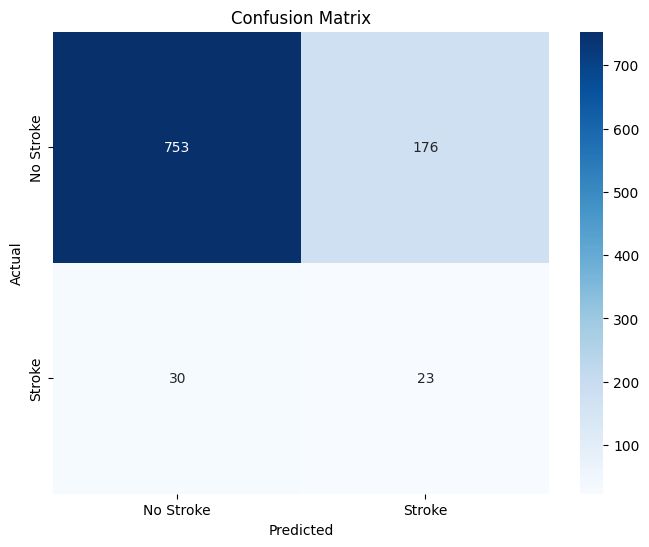

In [431]:
# Graficar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Stroke', 'Stroke'], yticklabels=['No Stroke', 'Stroke'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

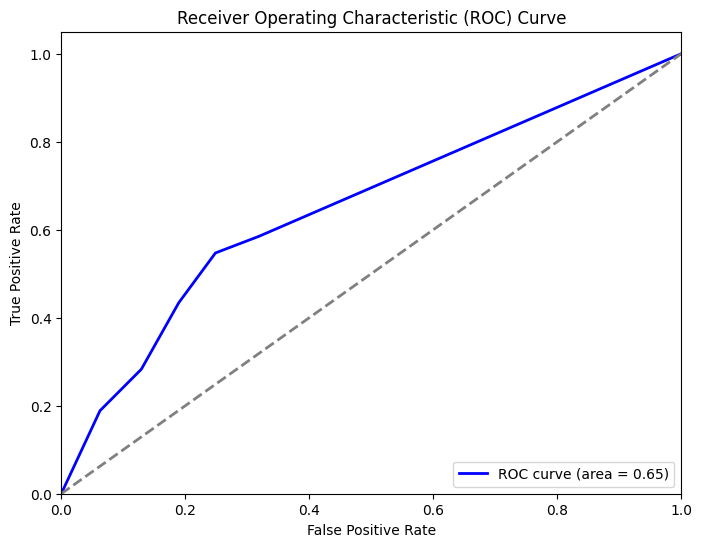

In [432]:
# Graficar la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Aunque el modelo muestra un buen rendimiento en la clasificación de la clase mayoritaria, enfrenta desafíos significativos en la clasificación de la clase minoritaria debido al desbalance de clases. Si el propósito es predecir casos donde un paciente sufra un accidente cerebrovascular, se puede decir que el modelo no es adecuado, sería necesario recolectar más datos o explorar otros algoritmos que sean adecuados para manejar clases desbalanceadas.